In [1]:
import tensorflow as tf 
print('tensorflow version', tf.__version__)
 
x = [[3.]]
y = [[4.]]
print('Result: {}'.format(tf.matmul(x, y)))

tensorflow version 2.11.0
Result: [[12.]]


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [3]:
imgs_path = r"E:\sem6\dailylearn\Train"
data = []
labels = []
classes = 43
for i in range(classes):
    z=str(i)
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path+'/'+img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


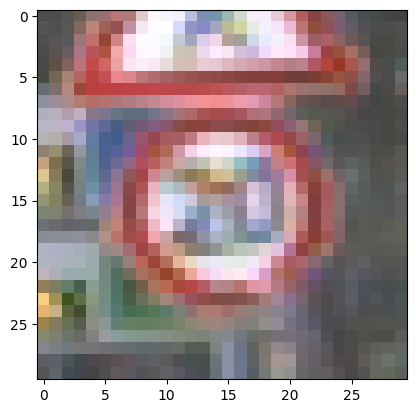

In [4]:
img = Image.open(r"E:\sem6\dailylearn\Train\0\00000_00000_00000.png")
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
#print(y_train)
print(y_test[0])
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)



training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)
26


In [ ]:
#print(y_train)
print(x_train[0])

[[[ 41  42  38]
  [ 54  51  43]
  [ 61  56  51]
  ...
  [ 38  41  41]
  [ 38  42  42]
  [ 38  42  42]]

 [[ 49  55  41]
  [ 62  72  53]
  [ 52  60  48]
  ...
  [ 34  39  39]
  [ 34  39  38]
  [ 35  38  37]]

 [[ 73  81  53]
  [ 82  96  67]
  [ 76  90  67]
  ...
  [ 35  39  41]
  [ 34  38  39]
  [ 38  40  41]]

 ...

 [[120 123 118]
  [ 74  83  88]
  [ 62  73  70]
  ...
  [105 117 104]
  [101 115 103]
  [117 127 113]]

 [[121 124 114]
  [ 92  98  99]
  [ 82  90  81]
  ...
  [ 99 109  93]
  [104 115 101]
  [111 124 114]]

 [[121 116  98]
  [119 114 101]
  [108 108  86]
  ...
  [ 94 105  89]
  [100 108  94]
  [ 98 107 100]]]


In [6]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [ ]:
print(x_train.shape[1:])

(30, 30, 3)


In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
epochs = 16
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/16
491/491 [==============================] - 74s 148ms/step - loss: 2.4121 - accuracy: 0.4151 - val_loss: 0.6475 - val_accuracy: 0.8356
Epoch 2/16
491/491 [==============================] - 78s 159ms/step - loss: 0.7484 - accuracy: 0.7815 - val_loss: 0.2531 - val_accuracy: 0.9310
Epoch 3/16
491/491 [==============================] - 78s 158ms/step - loss: 0.4451 - accuracy: 0.8705 - val_loss: 0.1199 - val_accuracy: 0.9644
Epoch 4/16
491/491 [==============================] - 75s 153ms/step - loss: 0.3254 - accuracy: 0.9056 - val_loss: 0.0961 - val_accuracy: 0.9744
Epoch 5/16
491/491 [==============================] - 78s 158ms/step - loss: 0.2664 - accuracy: 0.9233 - val_loss: 0.0895 - val_accuracy: 0.9737
Epoch 6/16
491/491 [==============================] - 77s 158ms/step - loss: 0.2308 - accuracy: 0.9322 - val_loss: 0.0564 - val_accuracy: 0.9853
Epoch 7/16
491/491 [==============================] - 77s 157ms/step - loss: 0.1967 - accuracy: 0.9445 - val_loss: 0.0664 - val_ac

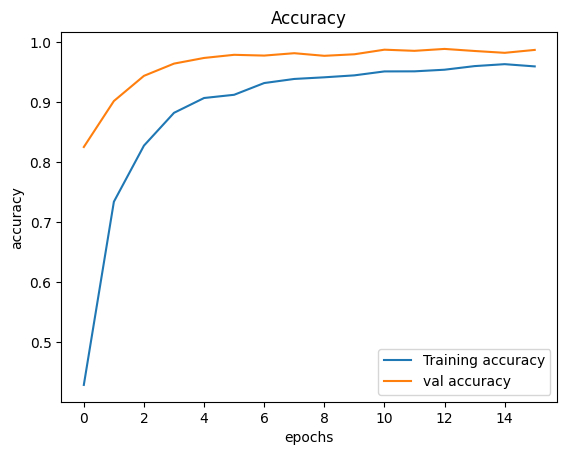

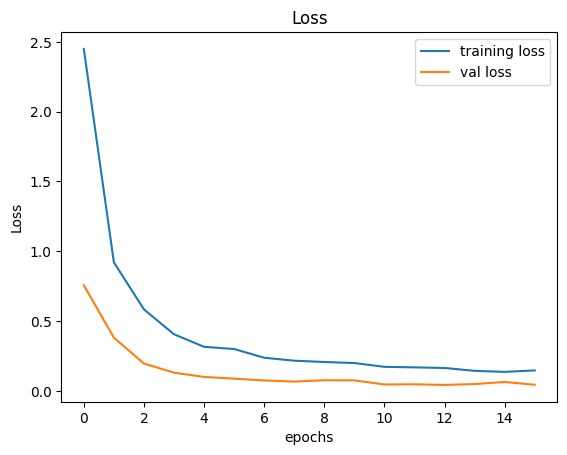

In [9]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
test = pd.read_csv(r"E:\sem6\dailylearn\Test.csv")
# a1=test.drop("Path",axis="columns")
# a2=a1.drop("Width",axis="columns")
# a3=a2.drop("Height",axis="columns")
# a4=a3.drop("Roi.X1",axis="columns")
# a5=a4.drop("Roi.X2",axis="columns")
# a6=a5.drop("Roi.Y1",axis="columns")
#a7=a6.drop("Roi.Y2",axis="columns")
test_labels = test['ClassId'].values
test_img_path = r"E:\sem6\dailylearn"
test_imgs = test['Path'].values
test_data = []
print(test_imgs[0])
im = Image.open(test_img_path + '/' + test_imgs[0])
im = im.resize((30,30))


im = np.array(im)
print(im.shape[1:])
nit=Image.fromarray(x_train[0])
nit.save("1.png")
im=x_train[0]
print(im.shape[1:])
test_data.append(im)  
test_data = np.array(test_data)
predict_x=model.predict(test_data)
print(predict_x)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

#test_labels = []


Test/00000.png
(30, 3)
(30, 3)
1/1 [==============================] - 0s 209ms/step
[[2.94012472e-32 1.24491758e-32 1.97141914e-36 4.46493191e-30
  2.32891500e-36 1.69510353e-31 2.38129456e-32 0.00000000e+00
  4.45292429e-37 2.19621076e-34 1.72804667e-33 5.37899573e-32
  3.59335599e-31 2.78180057e-29 0.00000000e+00 2.10124656e-30
  0.00000000e+00 2.69323063e-38 9.80678905e-27 2.84920082e-31
  9.03701399e-29 2.31350016e-35 1.59148248e-27 2.08261489e-36
  0.00000000e+00 3.90644074e-27 6.30561545e-33 3.79334768e-36
  9.26126647e-24 1.63590702e-33 0.00000000e+00 0.00000000e+00
  1.83264483e-27 0.00000000e+00 1.90361581e-26 1.24132314e-17
  1.00000000e+00 0.00000000e+00 1.05929919e-19 1.57986066e-37
  3.04028642e-34 9.10363584e-33 1.36259474e-38]]
[36]


In [11]:
test_data=[]
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)  
test_data = np.array(test_data)
predict_x=model.predict(test_data)
#print(predict_x)
classes_x=np.argmax(predict_x,axis=1)

classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }
count=0
for i in classes_x:
    if(i<=43 and i>0):
        print(classes[i])
    else:
        print("index error")
        count += 1
print(count)



395/395 [==============================] - 4s 9ms/step
No vehicles
Speed limit (20km/h)
Go straight or left
End speed + passing limits
No passing veh over 3.5 tons
Go straight or left
No entry
Right-of-way at intersection
Road narrows on the right
Turn left ahead
Right-of-way at intersection
End of speed limit (80km/h)
Bumpy road
End of speed limit (80km/h)
Speed limit (60km/h)
Speed limit (120km/h)
Dangerous curve right
Dangerous curve left
Traffic signals
Go straight or left
Speed limit (60km/h)
End speed + passing limits
Speed limit (120km/h)
Speed limit (50km/h)
Speed limit (20km/h)
No passing veh over 3.5 tons
Priority road
No passing
Speed limit (120km/h)
No passing veh over 3.5 tons
Speed limit (70km/h)
Veh > 3.5 tons prohibited
Turn right ahead
Bumpy road
Speed limit (30km/h)
Veh > 3.5 tons prohibited
Speed limit (50km/h)
Right-of-way at intersection
No vehicles
Speed limit (100km/h)
End of speed limit (80km/h)
Bicycles crossing
No entry
Right-of-way at intersection
Slippery ro

In [12]:
pip install tk

Note: you may need to restart the kernel to use updated packages.


In [13]:
model.save('traffic_classifier.h5')

In [14]:
from tkinter import filedialog
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image
from keras.models import load_model
import numpy as np
#load the trained model to classify traffic signs
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }
#initialize GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    print(file_path)
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.array(image)
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    predict_x=model.predict(image)
    pred=np.argmax(predict_x,axis=1)
    sign = classes[pred[0]+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)
    
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()
    

E:/sem6/dailylearn/Test/00008.png
1/1 [==============================] - 0s 91ms/step
Road work
E:/sem6/dailylearn/Test/00009.png
1/1 [==============================] - 0s 30ms/step
Ahead only
E:/sem6/dailylearn/Test/00316.png
1/1 [==============================] - 0s 20ms/step
Speed limit (50km/h)
E:/sem6/dailylearn/Test/00001.png
1/1 [==============================] - 0s 22ms/step
Speed limit (30km/h)
E:/sem6/dailylearn/Test/00006.png
1/1 [==============================] - 0s 34ms/step
General caution
E:/sem6/dailylearn/Test/00004.png
1/1 [==============================] - 0s 38ms/step
Right-of-way at intersection
E:/sem6/dailylearn/Test/00693.png
1/1 [==============================] - 0s 33ms/step
Yield
E:/sem6/dailylearn/Test/00003.png
1/1 [==============================] - 0s 35ms/step
Turn right ahead


In [ ]:

from flask import Flask,render_template,request
app=Flask(__name__)
@app.route("/")
def home():
    return render_template("upload.html")
@app.route("/result")
def result():
    output = request.form.to_dict()
    image = output["image"]
    image ="/"+ image
    image = Image.open()
    
    image = image.resize((30,30))
    image = np.array(image)
    predict_x=model.predict(image)
    pred=np.argmax(predict_x,axis=1)
    sign = classes[pred[0]+1]
    
    image = sign
    return render_template("upload.html",p=pred[0])
if __name__ == '__main__':
    
    app.run(debug=True,port=5001)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [ ]:
# import streamlit as st
# st.title("hello")
# streamlit run

SyntaxError: invalid syntax (214939714.py, line 3)

In [ ]:
# pip install streamlit

Note: you may need to restart the kernel to use updated packages.
